<a href="https://colab.research.google.com/github/moiz14553/CodeAlpha-/blob/main/IDCARDipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install cairosvg



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 765.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.6 MB/s eta 0:00:00


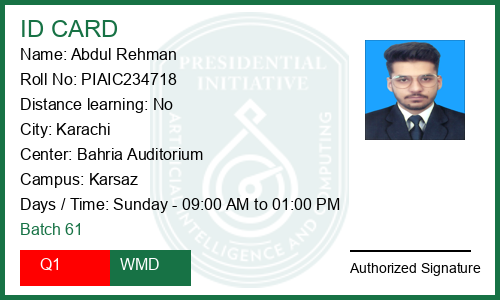

In [10]:
from PIL import Image, ImageDraw, ImageFont

# Load the profile picture
profile_pic = Image.open("/content/2023_11_27_22_32_IMG_1283.JPG").resize((100, 100))  # Resize as per your dimensions

# Load and prepare the logo for watermarking
piaic_logo = Image.open("/content/logo_converted.png").convert("RGBA")  # Ensure it's in RGBA mode
logo_width, logo_height = piaic_logo.size
# Adjust logo size if necessary and create a transparent version
watermark = piaic_logo.resize((int(logo_width * 1.5), int(logo_height * 1.5)))  # Resize as needed
transparent = Image.new("RGBA", watermark.size, (255, 255, 255, 0))  # Create a fully transparent image the size of the logo
watermark = Image.blend(transparent, watermark, alpha=0.3)  # Blend with low opacity

# Create the card base
card_width, card_height = 500, 300
card = Image.new("RGB", (card_width, card_height), color=(255, 255, 255))  # White background

# Create an ImageDraw object to draw on the card
draw = ImageDraw.Draw(card)

# Colors
green = (23, 114, 69)
red = (255, 0, 0)
black = (0, 0, 0)

# Add green border
border_thickness = 5
draw.rectangle([0, 0, card_width-1, card_height-1], outline=green, width=border_thickness)

# Load the Arial font
font_title = ImageFont.truetype("/content/arial.ttf", 24)
font_text = ImageFont.truetype("/content/arial.ttf", 16)
font_small = ImageFont.truetype("/content/arial.ttf", 14)

# Paste the watermark logo
card.paste(watermark, (int((card_width - watermark.width) / 2), int((card_height - watermark.height) / 2)), watermark)  # Center the watermark

# Add the text to the card
draw.text((20, 15), "ID CARD", font=font_title, fill=green)
draw.text((20, 45), "Name: Abdul Rehman", font=font_text, fill=black)
draw.text((20, 70), "Roll No: PIAIC234718", font=font_text, fill=black)
draw.text((20, 95), "Distance learning: No", font=font_text, fill=black)
draw.text((20, 120), "City: Karachi", font=font_text, fill=black)
draw.text((20, 145), "Center: Bahria Auditorium", font=font_text, fill=black)
draw.text((20, 170), "Campus: Karsaz", font=font_text, fill=black)
draw.text((20, 195), "Days / Time: Sunday - 09:00 AM to 01:00 PM", font=font_text, fill=black)
draw.text((20, 220), "Batch 61", font=font_text, fill=green)
# ... Add other text fields similarly

# Add the profile picture
card.paste(profile_pic, (365, 40))

# Authorized signature box
draw.line((350, 250, 470, 250), fill=black, width=2)
draw.text((350, 260), "Authorized Signature", font=font_small, fill=black)

# Add bottom boxes
draw.rectangle([20, card_height-50, 120, card_height-15], fill=red)
draw.rectangle([110, card_height-50, 190, card_height-15], fill=green)
draw.text((40, card_height-45), "Q1", font=font_text, fill=(255, 255, 255))
draw.text((120, card_height-45), "WMD", font=font_text, fill=(255, 255, 255))

# Save and show the card
card.save("/content/ID_card_generated.png")
from IPython.display import Image
display(Image(filename='/content/ID_card_generated.png'))